# Business Intelligence Analysis
## Customer Lifetime Value

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import business table
df1 = pd.read_csv('./Dataset/Businesses table.csv', parse_dates=['date_won'])
df1.head()

,business_uuid,date_won,city,business_type,sub_group,partner_pos
0,1441080511293-5ce45dcd-b3ce-4dd9-9e6d-4047a667...,2015-09-17,Cape Town,sole_proprietor,Retail,0
1,1443451760034-b317d70b-47b3-44cc-8238-bc93474e...,2015-09-28,Randburg,sole_proprietor,"Food, Drink & Hospitality",0
2,1446269527540-68231650-1320-4ff9-943f-28412f8b...,2015-11-06,Cape Town,sole_proprietor,Retail,0
3,1446732341500-16b51c71-bf68-428d-a198-b63a8a97...,2015-11-12,Cape Town,sole_proprietor,Retail,0
4,1407937721690-22878388-e481-46cb-8384-5dea1658...,2015-01-14,Cape Town,NaN,"Food, drink and hospitality",0


In [3]:
# import transaction subset table
df2 = pd.read_csv('./Dataset/transaction_subset.csv', parse_dates=['created'])
df2.head()

,transaction_uuid,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type
0,1424437465609-285a18be-f2fa-4d4c-a2ef-3bef9f3e...,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-02-20 13:04:25.607000+00:00,credit_card,60.0,approved,18.68068,NaN,NaN,NaN
1,1444994656054-91a37566-c9ce-435a-ae8f-5f9aeb27...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-16 11:24:16.052000+00:00,credit_card,220.0,approved,16.37625,ios,E105,WiFi
2,1451311977458-d794c535-d696-4830-b4b6-93c52ca5...,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-12-28 14:12:57.455000+00:00,credit_card,90.0,approved,13.51605,ios,E105,WiFi
3,1444763353752-bac376b0-80d9-46f5-9e21-9def71ee...,1436133508444-8d874705-6448-4d8d-88e0-5b0f8f4c...,2015-10-13 19:09:13.750000+00:00,credit_card,135.0,approved,15.06118,ios,M010,WiFi
4,1449883535047-1a9e1d5e-6151-4593-86db-bf504ab7...,1436123092750-68fb87cc-d43b-4468-9137-2841db30...,2015-12-12 01:25:35.047000+00:00,credit_card,162.0,approved,14.81583,ios,M010,WiFi


#### Merging both dataframes on business uuid

In [4]:
df = pd.merge(df1, df2, on=['business_uuid'], how='right')

In [5]:
df.head()

,business_uuid,date_won,city,business_type,sub_group,partner_pos,transaction_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type
0,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,NaT,NaN,NaN,NaN,NaN,1424437465609-285a18be-f2fa-4d4c-a2ef-3bef9f3e...,2015-02-20 13:04:25.607000+00:00,credit_card,60.0,approved,18.68068,NaN,NaN,NaN
1,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-05-21,Hermanus,company,"Food, drink and hospitality",1.0,1444994656054-91a37566-c9ce-435a-ae8f-5f9aeb27...,2015-10-16 11:24:16.052000+00:00,credit_card,220.0,approved,16.37625,ios,E105,WiFi
2,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-10-16,Heidelberg Wc,company,"Food, drink and hospitality",1.0,1451311977458-d794c535-d696-4830-b4b6-93c52ca5...,2015-12-28 14:12:57.455000+00:00,credit_card,90.0,approved,13.51605,ios,E105,WiFi
3,1436133508444-8d874705-6448-4d8d-88e0-5b0f8f4c...,2015-08-18,Cape Town,sole_proprietor,"Food, drink and hospitality",1.0,1444763353752-bac376b0-80d9-46f5-9e21-9def71ee...,2015-10-13 19:09:13.750000+00:00,credit_card,135.0,approved,15.06118,ios,M010,WiFi
4,1436123092750-68fb87cc-d43b-4468-9137-2841db30...,2015-07-09,Cape Town,company,"Food, drink and hospitality",1.0,1449883535047-1a9e1d5e-6151-4593-86db-bf504ab7...,2015-12-12 01:25:35.047000+00:00,credit_card,162.0,approved,14.81583,ios,M010,WiFi


Now that both dataframes are successfully merged we can move into Exploratory Data Analysis

In [6]:
df.rename(columns={"created": "date"}, inplace=True)

## Exploratory Data Analysis

In [7]:
# HELPER FUNCTIONS (UTILS)

# Check dataframe
def check_df(dataframe, head=5, tail=5, quan=False):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(tail))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

    if quan:
        print("##################### Quantiles #####################")
        print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

# Date Features
def create_date_features(df):
    df['month'] = df.date.dt.month
    df['day_of_year'] = df.date.dt.dayofyear
    df['week_of_year'] = df.date.dt.weekofyear
    df['day_of_week'] = df.date.dt.dayofweek
    df["day_name"]= df.date.dt.day_name()
    return df

def plot_barPlot(data,x,y,title,xlabel,ylabel):
    '''Plots bar plot'''
    plt.figure(figsize=(17,8))
    splot=sns.barplot(data=data,x=x,y=y,ci=0)

    for p in splot.patches:
        splot.annotate(round(p.get_height(),2),#text that you want to write on top
                       (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
                       ha = 'center', va = 'center',# alignment of the text
                       xytext = (0, 10),# distance of text from top of the patch
                       textcoords = 'offset points') #do not change and remove it
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [8]:
df.shape

(42831, 15)

In [9]:
# Checking numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
partner_pos,38072.0,0.743013,0.436978,0.00000,0.00000,1.00000,1.00000,1.00
amount_usd,42831.0,324.519121,6406.349263,-4633.00000,58.00000,130.00000,280.00000,984150.71
processing_time,38101.0,29.091659,584.337167,-111.69399,12.08886,15.09173,20.35825,58770.14


Looking at the descriptive statistics of numerical variables, we can see that there are negative values in the Amount (USD). These transactions are refunded orders. In the next step (data preprocessing), we'll eliminate these observations.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42831 entries, 0 to 42830
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   business_uuid      42831 non-null  object             
 1   date_won           38072 non-null  datetime64[ns]     
 2   city               38071 non-null  object             
 3   business_type      37119 non-null  object             
 4   sub_group          38072 non-null  object             
 5   partner_pos        38072 non-null  float64            
 6   transaction_uuid   42831 non-null  object             
 7   date               42831 non-null  datetime64[ns, UTC]
 8   transaction_type   42831 non-null  object             
 9   amount_usd         42831 non-null  float64            
 10  transaction_state  42831 non-null  object             
 11  processing_time    38101 non-null  float64            
 12  phone_type         30122 non-null  object     

In [11]:
df.isnull().sum()

business_uuid            0
date_won              4759
city                  4760
business_type         5712
sub_group             4759
partner_pos           4759
transaction_uuid         0
date                     0
transaction_type         0
amount_usd               0
transaction_state        0
processing_time       4730
phone_type           12709
reader_type          16477
connection_type      16927
dtype: int64

## Data Preprocessing

In [12]:
data = df.copy()

In [13]:
data.loc[data['amount_usd'] == -4633]

,business_uuid,date_won,city,business_type,sub_group,partner_pos,transaction_uuid,date,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type
2408,1449084462951-06638e74-f7d4-42c9-be90-359d7ee5...,2015-12-03,Johannesburg,company,Home and repair,0.0,1450691250499-bc471286-7d1c-4fa1-a918-3a473ae3...,2015-12-21 09:47:30.499000+00:00,refund,-4633.0,approved,NaN,NaN,NaN,NaN


In [14]:
# Data preparation step 1: Removing null oberservations
data.dropna(subset=['business_type'], inplace=True)

# Data preparation step 2: Removing refund transactions 
data = data[~data["transaction_type"].str.contains("refund", na=False)]

data.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
partner_pos,37043.0,0.754987,0.430100,0.00000,0.00000,1.00000,1.00000,1.000000,1.000000,1.00
amount_usd,37043.0,284.919690,1035.983793,0.00000,2.00000,64.92500,135.00000,286.000000,2200.000000,75100.00
processing_time,33915.0,30.464863,619.185128,-111.69399,2.76989,12.24012,15.23971,20.577055,86.266847,58770.14


Looking at the descriptive statistics of numerical variables again! We can see that the value at the 99% quantile of Amount (USD) column is far greater than the maximum value. We can say that there are some outliers.

Let's find out these outliers and replace them with the highest limit.

In [15]:
# Defining functions for outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Defining functions to replace outliers
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [16]:
# Data preparation step 3: Replacing outliers in the amount (usd) column with the upper limit
replace_with_thresholds(data, "amount_usd")

data.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
partner_pos,37043.0,0.754987,0.430100,0.00000,0.00000,1.00000,1.00000,1.000000,1.000000,1.00
amount_usd,37043.0,263.502198,458.846951,0.00000,2.00000,64.92500,135.00000,286.000000,2200.000000,5497.00
processing_time,33915.0,30.464863,619.185128,-111.69399,2.76989,12.24012,15.23971,20.577055,86.266847,58770.14


In [17]:
#Remove time and leave just date
data['date'] = pd.to_datetime(data['date']).dt.date

From the assumption that revenue is 1% of every approved transaction

In [18]:
# Data preparation step 4: Calculating Revenue 
data['revenue'] = data['amount_usd'] * 0.01

In [19]:
data.date.max()

datetime.date(2015, 12, 30)

In [21]:
# Defining today date as max(date) + 2 days
import datetime as dt
todays_date = dt.date(2016, 1, 1)
print(f" Maximum transaction date: {data.date.max()} \n Today date: {todays_date}")

 Maximum transaction date: 2015-12-30 
 Today date: 2016-01-01


In [22]:
# Create extra date fields for analysis
create_date_features(df)

<ipython-input-7-df34b0eaddd5>:24: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df.date.dt.weekofyear


,business_uuid,date_won,city,business_type,sub_group,partner_pos,transaction_uuid,date,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type,month,day_of_year,week_of_year,day_of_week,day_name
0,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,NaT,NaN,NaN,NaN,NaN,1424437465609-285a18be-f2fa-4d4c-a2ef-3bef9f3e...,2015-02-20 13:04:25.607000+00:00,credit_card,60.0,approved,18.680680,NaN,NaN,NaN,2,51,8,4,Friday
1,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-05-21,Hermanus,company,"Food, drink and hospitality",1.0,1444994656054-91a37566-c9ce-435a-ae8f-5f9aeb27...,2015-10-16 11:24:16.052000+00:00,credit_card,220.0,approved,16.376250,ios,E105,WiFi,10,289,42,4,Friday
2,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-10-16,Heidelberg Wc,company,"Food, drink and hospitality",1.0,1451311977458-d794c535-d696-4830-b4b6-93c52ca5...,2015-12-28 14:12:57.455000+00:00,credit_card,90.0,approved,13.516050,ios,E105,WiFi,12,362,53,0,Monday
3,1436133508444-8d874705-6448-4d8d-88e0-5b0f8f4c...,2015-08-18,Cape Town,sole_proprietor,"Food, drink and hospitality",1.0,1444763353752-bac376b0-80d9-46f5-9e21-9def71ee...,2015-10-13 19:09:13.750000+00:00,credit_card,135.0,approved,15.061180,ios,M010,WiFi,10,286,42,1,Tuesday
4,1436123092750-68fb87cc-d43b-4468-9137-2841db30...,2015-07-09,Cape Town,company,"Food, drink and hospitality",1.0,1449883535047-1a9e1d5e-6151-4593-86db-bf504ab7...,2015-12-12 01:25:35.047000+00:00,credit_card,162.0,approved,14.815830,ios,M010,WiFi,12,346,50,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42826,1438089547854-f1529357-1835-4c0e-967b-f5fbf915...,2015-08-11,George,company,"Food, drink and hospitality",0.0,1443350389702-3722b239-c757-4643-a0d4-7aa51ad8...,2015-09-27 10:39:49.700000+00:00,credit_card,130.0,approved,14.564001,android,M010,HSPA+,9,270,39,6,Sunday
42827,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-10-16,Heidelberg Wc,company,"Food, drink and hospitality",1.0,1450019861028-9c48ef64-1d5c-4196-9e7e-4eab1c2c...,2015-12-13 15:17:41.028000+00:00,credit_card,172.0,approved,15.354740,ios,E105,WiFi,12,347,50,6,Sunday
42828,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-05-21,Hermanus,company,"Food, drink and hospitality",1.0,1444847699101-51730957-8553-4e7f-8adb-efbc4e9a...,2015-10-14 18:34:59.099000+00:00,credit_card,550.0,approved,12.659350,ios,E105,WiFi,10,287,42,2,Wednesday
42829,1438089547854-f1529357-1835-4c0e-967b-f5fbf915...,2015-08-11,George,company,"Food, drink and hospitality",0.0,1451382983297-0b46e19e-296d-434a-b323-8f14d0d3...,2015-12-29 09:56:23.296000+00:00,credit_card,60.0,aborted,4.962000,android,M010,HSPA+,12,363,53,1,Tuesday


## Deriving RFM Metrics for determing Customer Lifetime Value

CLV models are built around 4 key metrics. These are:


**Recency:** The age of the customer at the time of their last transaction.

**Monetary:** The average total sales of the customer.

**Frequency:** Number of transactions.

**Age (T):** The age of the customer since the date of a customer's first transaction to the current date.

In [23]:
data.columns

Index(['business_uuid', 'date_won', 'city', 'business_type', 'sub_group',
       'partner_pos', 'transaction_uuid', 'date', 'transaction_type',
       'amount_usd', 'transaction_state', 'processing_time', 'phone_type',
       'reader_type', 'connection_type', 'revenue'],
      dtype='object')

In [24]:
# Calculating recency, monetary, frequency and tenure metrics
rfm = data.groupby("business_uuid").agg({"date": [lambda date: (date.max() - date.min()).days,
                                                     lambda date: (todays_date - date.min()).days],
                                     "transaction_uuid": lambda num: num.nunique(),
                                      "amount_usd": lambda price: price.sum()}) #total price per customer

rfm.columns = rfm.columns.droplevel(0)
rfm.columns = ['Recency', "T", 'Frequency', "Monetary"]

# Calculating average monetary values per order:
rfm["Monetary"] = rfm["Monetary"] / rfm["Frequency"]

rfm.head()

,Recency,T,Frequency,Monetary
business_uuid,,,,
1411120534868-d0e07e18-26b7-4e26-a0f3-45736855c3cd,204,255,7,1550.714286
1414229837135-05cd5b05-3234-46df-9eb3-37f985b5f7a2,265,275,26,697.692308
1417541600310-062cad22-d0cd-4a7c-a22d-d8ed78959f18,322,334,222,118.702748
1419247136977-8b58a827-d849-4562-b610-3738e1ec535c,71,75,42,797.841190
1423655897813-8273bf5c-230e-4a17-9a71-5ec69fe178d7,275,322,20,1048.707500


In [25]:
# Removing one-time purchases from dataset
rfm = rfm[(rfm['Frequency'] > 1)]
rfm.head()

,Recency,T,Frequency,Monetary
business_uuid,,,,
1411120534868-d0e07e18-26b7-4e26-a0f3-45736855c3cd,204,255,7,1550.714286
1414229837135-05cd5b05-3234-46df-9eb3-37f985b5f7a2,265,275,26,697.692308
1417541600310-062cad22-d0cd-4a7c-a22d-d8ed78959f18,322,334,222,118.702748
1419247136977-8b58a827-d849-4562-b610-3738e1ec535c,71,75,42,797.841190
1423655897813-8273bf5c-230e-4a17-9a71-5ec69fe178d7,275,322,20,1048.707500


In [26]:
clv = rfm.copy()

## Modelling (Expected average spend)
In this step, we will train the BG/NBD model to estimate the expected average spend in a given period of time. Also, the trained BG/NBD model will be used in predicting customer lifetime value in the following steps.

In [ ]:
#pip install lifetimes

In [27]:
# Loading the required libraries
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix

In [28]:
# Checking BG/NBD model assumption and requirements
print(clv[['Monetary', 'Recency']].corr())  # Correlation between monetary ve recency variables
clv["Frequency"] = clv["Frequency"].astype(int) # Type of frequency variable should be integer for BG-NBD model

          Monetary   Recency
Monetary  1.000000 -0.065241
Recency  -0.065241  1.000000


In [33]:
# Creating Gamma-Gamma Model
ggf = GammaGammaFitter(penalizer_coef=0.01) # model object
ggf.fit(clv['Frequency'], clv['Monetary']) # model fitting

# Prediction of expected amount of average profit
clv["expct_avg_spend"] = ggf.conditional_expected_average_profit(clv['Frequency'], clv['Monetary'])

clv.head()

,Recency,T,Frequency,Monetary,expct_avg_spend
business_uuid,,,,,
1411120534868-d0e07e18-26b7-4e26-a0f3-45736855c3cd,204,255,7,1550.714286,1599.581405
1414229837135-05cd5b05-3234-46df-9eb3-37f985b5f7a2,265,275,26,697.692308,703.549880
1417541600310-062cad22-d0cd-4a7c-a22d-d8ed78959f18,322,334,222,118.702748,118.830935
1419247136977-8b58a827-d849-4562-b610-3738e1ec535c,71,75,42,797.841190,801.963576
1423655897813-8273bf5c-230e-4a17-9a71-5ec69fe178d7,275,322,20,1048.707500,1060.098059


In [44]:
clv['T_clv'] = clv['T'] - clv['Recency']
clv.head()

,Recency,T,Frequency,Monetary,expct_avg_spend,T_clv
business_uuid,,,,,,
1411120534868-d0e07e18-26b7-4e26-a0f3-45736855c3cd,204,255,7,1550.714286,1599.581405,51
1414229837135-05cd5b05-3234-46df-9eb3-37f985b5f7a2,265,275,26,697.692308,703.549880,10
1417541600310-062cad22-d0cd-4a7c-a22d-d8ed78959f18,322,334,222,118.702748,118.830935,12
1419247136977-8b58a827-d849-4562-b610-3738e1ec535c,71,75,42,797.841190,801.963576,4
1423655897813-8273bf5c-230e-4a17-9a71-5ec69fe178d7,275,322,20,1048.707500,1060.098059,47


#### Most valuable customers for the year

In [46]:
clv.sort_values("T_clv",ascending=True).head()

,Recency,T,Frequency,Monetary,expct_avg_spend,T_clv
business_uuid,,,,,,
1443443143895-d23c7c27-416b-41eb-9d6d-2f6b409a22c4,89,91,477,182.623061,182.711084,2
1447927563274-da7673a7-a23b-4f01-95d1-0815e169de8a,30,32,69,233.050725,233.816097,2
1438065141962-8b6a526c-b07c-4f38-8f1e-df3082e4eb8d,151,153,171,58.479532,58.571316,2
1433261949212-0f063505-cbe5-4a18-b3ba-59ee0df6652c,204,206,334,434.365868,434.651336,2
1438089547854-f1529357-1835-4c0e-967b-f5fbf9152c8c,141,143,292,177.767397,177.907704,2


#### Least valuable customers for the year

In [64]:
clv.sort_values("T_clv",ascending=False).head(10)

,Recency,T,Frequency,Monetary,expct_avg_spend,T_clv
business_uuid,,,,,,
1424860575679-e0eba238-ac4a-4526-8b68-8c4341c2d58b,19,288,3,610.000000,657.515723,269
1429184568757-51a31acb-48a2-4bb0-9fbb-c4d25269baed,4,256,8,172.125000,177.228221,252
1425650677867-af9f5c07-3320-46e2-8d0a-74070c847c0f,0,238,2,110.500000,125.427360,238
1429708753368-f9afe2c6-9f20-43a7-b97a-dc2a2df6359d,12,247,3,457.666667,493.611122,235
1424098685273-2a91b97c-d62c-41a3-a6b7-76e34febc3b2,64,299,13,176.153846,179.328507,235
1431427935079-d70f51bb-9071-4386-be3f-1cf0cdfc460b,10,232,55,210.527273,211.401152,222
1432797607708-aee8136d-ca30-49e5-859e-3ad9c2b72669,0,217,2,69.000000,79.012159,217
1433857594053-512f9c3d-fa40-4c1f-a558-ba0e33a6da1f,0,201,2,500.000000,561.059188,201
1434017588684-d10062ea-411e-4433-bde0-ee688435e4bc,4,202,3,49.333333,54.260714,198


## Data Analysis

### Weekly Mean Processing Time

Assuming Processing Time is in **seconds**

In [47]:
df['processing_time'].isnull().sum()

4730

##### We have 4730 missing values in the processing time column, this will affect the mean calculation if not handled. It would be wrong to replace the missing values with zero as that would mean that some transactions had a processing time of 0 secs. So i have decided to handle the missing values by dropping the rows with NaN values for processing time.

In [48]:
subdf = df.dropna(subset=['processing_time'])

In [49]:
subdf.shape

(38101, 20)

In [50]:
# Weekly Mean Processing Time
mean_pt =(subdf.groupby(["week_of_year"])[["processing_time"]].mean().reset_index().sort_values('week_of_year'))
mean_pt

,week_of_year,processing_time
0,5,21.853267
1,6,18.604034
2,7,19.192811
3,8,18.637144
4,9,17.008856
5,10,15.060760
6,11,22.750126
7,12,16.849772
8,13,16.038627
9,14,15.443308


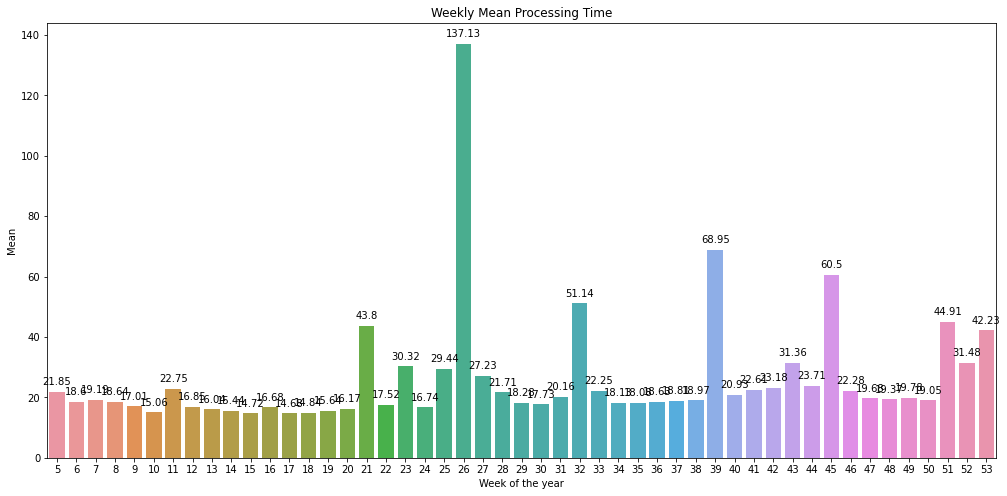

In [51]:
plot_barPlot(mean_pt,"week_of_year","processing_time","Weekly Mean Processing Time","Week of the year","Mean")

### Transaction Approval rate 

Transaction approval rate = total number of approved transactions / total number of attempted transactions over a fixed time period

In [52]:
df.shape

(42831, 20)

In [53]:
df['transaction_state'].value_counts()

approved          34026
error              4620
aborted            3221
declined            771
refunded            188
refund_pending        3
created               2
Name: transaction_state, dtype: int64

In [54]:
# Total number of approved transactions
total_no_approved_trans = 34026

In [55]:
# Total number of attempted transactions 
total_no_attempted_trans = 42831

In [56]:
# Transaction approval rate
approval_rate = total_no_approved_trans/total_no_attempted_trans
approval_rate

0.7944245990053933

##### The transaction approval rate is 79.44%

### Credit card transaction rate

Credit card transaction rate = total number of credit card transactions / total number of transactions over a fixed time period

In [57]:
df.shape

(42831, 20)

In [58]:
df['transaction_type'].value_counts()

credit_card    40694
cash            1783
refund           353
adjustment         1
Name: transaction_type, dtype: int64

In [59]:
# Total number of credit card transactions
total_no_cc_trans = 40694

In [60]:
# Total number of transactions 
total_no_trans = 42831

In [61]:
# Credit card transaction rate
cc_trans_rate = total_no_cc_trans/total_no_trans
cc_trans_rate

0.9501062314678621

##### The credit card transaction rate is 95.01%

### Average transactions per week

The average transaction per week is calculated by dividing the total value of all transactions per week by the number of transactions for that week.

In [62]:
# Average transactions per week
trans_per_wk =(df.groupby(["week_of_year"])[["amount_usd"]].mean().reset_index().sort_values('week_of_year'))
trans_per_wk

,week_of_year,amount_usd
0,1,198.250000
1,2,238.093827
2,3,121.985106
3,4,151.238990
4,5,175.751538
5,6,456.275474
6,7,115.851875
7,8,196.359130
8,9,203.268072
9,10,245.012025


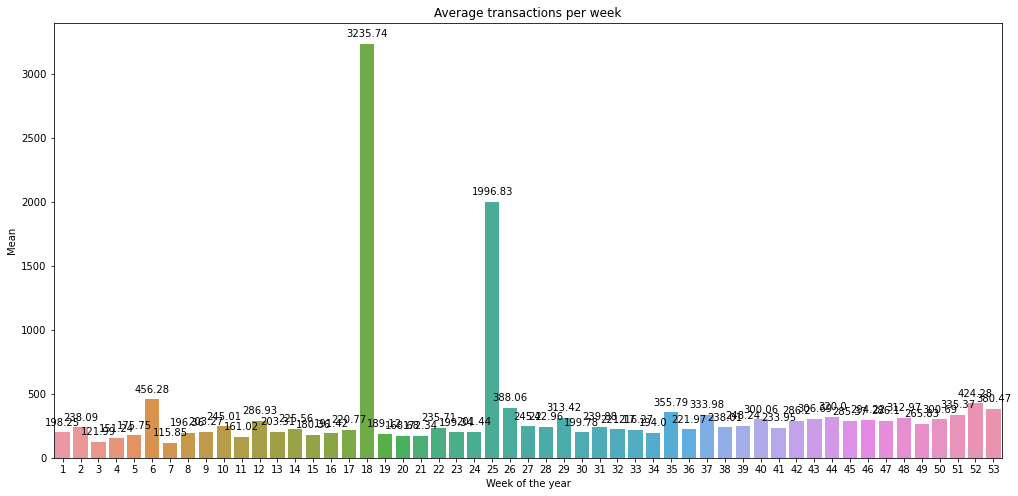

In [63]:
plot_barPlot(trans_per_wk,"week_of_year","amount_usd","Average transactions per week","Week of the year","Mean")